<a href="https://colab.research.google.com/github/shanthivijayan/Python-Data-Analysis/blob/main/Binning_and_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np


In [46]:
df_auto_mpg=pd.read_excel("/content/auto-mpg .xlsx")
df_auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,1,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,1,ford torino,JEETMEET


In [47]:
#1. Drop column Origin from the dataset.
df_auto_mpg.drop('origin',axis=1, inplace=True)
df_auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET


In [48]:
#2. Find out all the missing values in the dataset and replace it with its most appropriate replacement.
df_isnull=df_auto_mpg.isnull().sum()
df_isnull

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    2
model year      2
car name        0
CAR Number      7
dtype: int64

In [49]:
mean_acc=df_auto_mpg["acceleration"].mean()
df_auto_mpg['acceleration'].fillna(mean_acc)

0     12.0
1     11.5
2     11.0
3     12.0
4     10.5
      ... 
93    14.5
94    11.0
95    11.0
96    11.0
97    16.5
Name: acceleration, Length: 98, dtype: float64

In [58]:
#3. Find and remove duplicate entries for the column ‘ CAR Number’
df_duplicate_CarNumer=df_auto_mpg[df_auto_mpg['CAR Number'].duplicated()]
df_duplicate_CarNumer
df_auto_mpg.drop_duplicates(subset=['CAR Number'],keep='first',inplace=True)

4. Get the basic insights:
✔ Display the first five and last five rows
✔ Display all the column names in the dataset
✔ Display the concise summary of your dataset
✔ Display the name of the car with maximum number of horsepower.

In [52]:
#Display the first five and last five rows
print(df_auto_mpg.head(5))
print(df_auto_mpg.tail(5))

   mpg  cylinders  displacement  horsepower  weight  acceleration  model year  \
0   18          8         307.0         130    3504          12.0        70.0   
1   15          8         350.0         165    3693          11.5        70.0   
2   18          8         318.0         150    3436          11.0        70.0   
3   16          8         304.0         150    3433          12.0        70.0   
4   17          8         302.0         140    3449          10.5        70.0   

                    car name CAR Number  
0  chevrolet chevelle malibu    L6V 043  
1          buick skylark 320     RTY079  
2         plymouth satellite     MTP600  
3              amc rebel sst     MNJ000  
4                ford torino   JEETMEET  
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
93   14          8         318.0         150    4237          14.5   
94   13          8         440.0         215    4735          11.0   
95   12          8         455.0         225    495

In [53]:
#Display all the column names in the dataset
df_auto_mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'car name', 'CAR Number'],
      dtype='object')

In [54]:
#Display the concise summary of your dataset
df_auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 97
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           90 non-null     int64  
 1   cylinders     90 non-null     int64  
 2   displacement  90 non-null     float64
 3   horsepower    90 non-null     int64  
 4   weight        90 non-null     int64  
 5   acceleration  88 non-null     float64
 6   model year    88 non-null     float64
 7   car name      90 non-null     object 
 8   CAR Number    89 non-null     object 
dtypes: float64(3), int64(4), object(2)
memory usage: 7.0+ KB


In [60]:
#Display the name of the car with maximum number of horsepower
#df_maximum_horse_power=df_auto_mpg['horsepower'].max()

#print(df_maximum_horse_power)

df_car_name=df_auto_mpg[['car name','horsepower']].max()
print("The Name of the Car with Maximum number of horsepower ",df_car_name['car name'])

The Name of the Car with Maximum number of horsepower  volvo 145e (sw)


In [59]:
'''
5. In our dataset, the fuel consumption column is "mpg" and is represented by mpg
(miles per gallon) unit. Assume we are developing an application in a country
that accepts fuel consumption with the L/100km standard. change the name of
the column to "L/100km".
'''

df_auto_mpg.rename(columns={'mpg':'L/100km'},inplace=True)
df_auto_mpg.columns

Index(['L/100km', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'car name', 'CAR Number'],
      dtype='object')

In [61]:
'''
6. Normalize the column “Weight” so that the values range from 0 to 1
7. Normalization is the process of transforming values of several variables into a
similar range. Typical normalizations include scaling the variable so the variable
average is 0, scaling the variable so the variance is 1, or scaling variable so the
variable values range from 0 to 1
8. Approach: replace original value by (original value)/(maximum value)
'''
df_auto_mpg['weight']=df_auto_mpg['weight']/df_auto_mpg["weight"].max()
df_auto_mpg['weight'].round(2)

0     0.68
1     0.72
2     0.67
3     0.67
4     0.67
      ... 
93    0.82
94    0.92
95    0.96
96    0.74
97    0.61
Name: weight, Length: 90, dtype: float64

In [75]:
'''
9. In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it
has 57 unique values. What if we only care about the price difference between
cars with high horsepower, medium horsepower, and little horsepower (3
types)? Can we rearrange them into three ‘bins' to simplify analysis?
'''
bins=np.linspace(min(df_auto_mpg['horsepower']),max(df_auto_mpg['horsepower']),4)
group_names=['High Horsepower',"Medium Horsepower","Little Horsepower"]
df_auto_mpg["Horse_binner"]=pd.cut(df_auto_mpg['horsepower'],bins,labels=group_names,include_lowest=True)
#df_auto_mpg["Horse_binner"].unique()
df_auto_mpg.head(10)


,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number,Horse_binner
0,18,8,307.0,130,0.681712,12.0,70.0,chevrolet chevelle malibu,L6V 043,Medium Horsepower
1,15,8,350.0,165,0.718482,11.5,70.0,buick skylark 320,RTY079,Medium Horsepower
2,18,8,318.0,150,0.668482,11.0,70.0,plymouth satellite,MTP600,Medium Horsepower
3,16,8,304.0,150,0.667899,12.0,70.0,amc rebel sst,MNJ000,Medium Horsepower
4,17,8,302.0,140,0.671012,10.5,70.0,ford torino,JEETMEET,Medium Horsepower
5,15,8,429.0,198,0.844553,10.0,70.0,ford galaxie 500,NEET090,Little Horsepower
6,14,8,454.0,220,0.847082,9.0,70.0,chevrolet impala,NEET098,Little Horsepower
7,14,8,440.0,215,0.838911,8.5,70.0,plymouth fury iii,MNOP56,Little Horsepower
8,14,8,455.0,225,0.860895,10.0,70.0,pontiac catalina,NMTL580,Little Horsepower
9,15,8,390.0,190,0.749027,8.5,70.0,amc ambassador dpl,NaN,Little Horsepower


(array([29.,  0.,  0.,  0.,  0., 22.,  0.,  0.,  0., 39.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

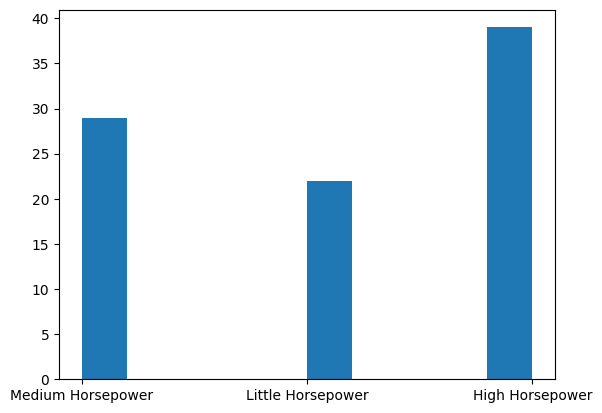

In [77]:
import matplotlib.pyplot as plt

plt.hist(df_auto_mpg['Horse_binner'])


<Axes: >

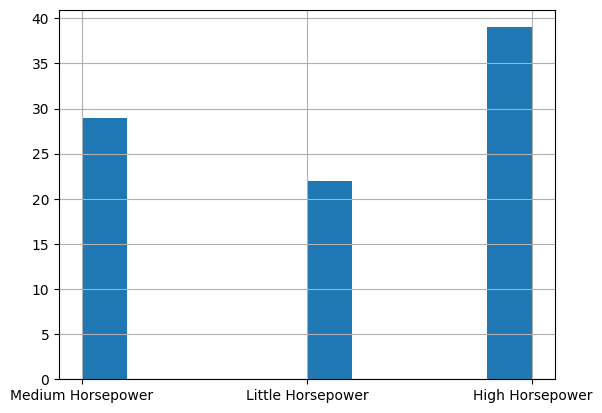

In [78]:
df_auto_mpg['Horse_binner'].hist()